In [1]:
# define a test function
# the test function simulation the score of a data scientist graduate in the job market for a medium company IN CHINA
# 'grade' is a float between 2.00 and 4.00, around 3.5 is prefered (too high may be fake)
# 'background' is a float between 0.00 and 1.00 which measures the degree of professional fit
# 'age' is an int between 18 and 34, 26-30 is prefered
# 'internship' is the number of interships that can be [0, 1, 2, 3, 4, 5]
# 'school' is a label in ['top4', '985', '211', 'level-1', 'level-2', 'level-3', 'others']
# 'level' is a label in ['professor', 'doctor', 'master', 'bachelor', 'others']

In [2]:
def test(grade, background, age, internship, school, level):
        school_score = {'top4': 1.5, '985': 1.2, '211': 1.0, 'level-1': 0.8, 'level-2': 0.6, 'level-3': 0.4, 'others': 0.2}
        level_score = {'professor': 0.8, 'doctor': 1.0, 'master': 1.2, 'bachelor': 1.0, 'others': 0.5}
        internship_score = {0:0.5, 1:1, 2:1.2, 3:1.5, 4:1, 5:0.8}
        age_score = -(age - 28) ** 2 + 100
        grade_score = (-(grade - 3.5) ** 2 + 2.25) * 4 / 9
        return grade_score * background * age_score * internship_score[internship] * school_score[school] * level_score[level] / 2

print('top optimum score is: ', test(3.5, 1.00, 28, 3, 'top4', 'master'))

top optimum score is:  135.0


In [3]:
import evolutionary_parameter_optimization as epo

continuous_list = [ ['grade', [2.00, 4.00]], ['background', [0.00, 1.00]] ]
int_list = [ ['age', range(18, 35, 1)], ['internship', range(0, 6, 1)] ]
label_list = [ ['school', ['top4', '985', '211', 'level-1', 'level-2', 'level-3', 'others']], ['level', ['professor', 'doctor', 'master', 'bachelor', 'others']] ]
order = ['grade', 'background', 'age', 'internship', 'school', 'level']
parameters = [continuous_list, int_list, label_list]
settings = (50, True, 0.2, 0.1)
end = ('iteration', 100)

res = epo.evolution_parameter_optimization(test, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)

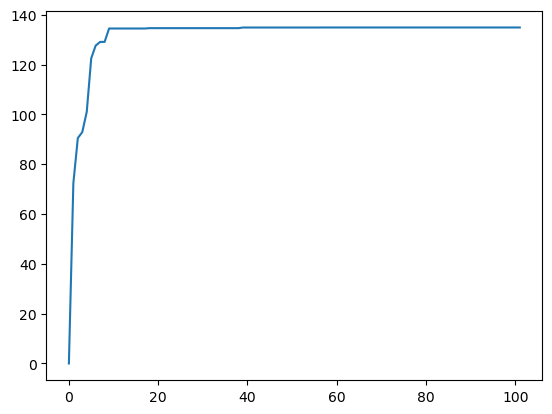

In [4]:
import matplotlib.pyplot as plt

plt.plot(res[1])
plt.show()

In [5]:
res[0]

,grade,background,age,internship,school,level,result,performance
0,3.50714,0.999136,28.0,3.0,top4,master,134.880251,18192.682058


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification

import evolutionary_parameter_optimization as epo

In [7]:
x, y = make_classification(n_samples=2000,n_features=10,n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_train=np.array(y_train)
y_test=np.array(y_test)

cl=[]
intl=[['min_samples_split',[2,3,4]],['n_estimators',[100,200,300,400,500]]]
labl=[['criterion',['gini','entropy']],['max_features',['sqrt','log2']]]
parameters = [cl, intl, labl]
order=['min_samples_split','n_estimators','criterion','max_features']
settings = (20, True, 0.25, 0.1)
end = ('iteration', 10)
def rf_f1(min_samples_split,n_estimators,criterion,max_features):
    return f1_score(y_test,RandomForestClassifier(min_samples_split = int(min_samples_split), n_estimators = int(n_estimators),criterion = criterion,max_features = max_features).fit(X_train,y_train).predict(X_test),average='micro')

In [8]:
res = epo.evolution_parameter_optimization(rf_f1, parameters, order, performance_function = epo.default_performance, settings = settings, end = end)

In [9]:
res[1]

[0,
 0.9,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666,
 0.9066666666666666]

In [10]:
res[0]

,min_samples_split,n_estimators,criterion,max_features,result,performance
20,4.0,200.0,gini,log2,0.906667,0.822044
